
# 4.5. Call Python community packages from MATLAB

In some scientific fields like earth and climate sciences, we observe a growing Python community. But as programming skills may vary a lot in researchers and engineers, a MATLAB interface to Python community packages can open up some domain specific capabilities to the 5M+ MATLAB community.


One great example of this is the [Climate Data Store Toolbox](https://github.com/mathworks/climatedatastore) developed by Rob Purser, a fellow MathWorker. Rob and I are part of the MathWorks Open Source Program core team. We are promoting open-source, both to support the use of open-source software in MathWorks products and to help for MathWorkers to contribute their work on GitHub and the [MATLAB File Exchange](https://www.mathworks.com/matlabcentral/fileexchange/).


In this section we will demonstrate with the Climate Data Store Toolbox how to build MATLAB toolboxes on top of Python packages. It relies on the [<u>CDS Python API</u>](https://github.com/ecmwf/cdsapi) created by the European Centre for Medium-Range Weather Forecasts (ECMWF). The toolbox will automatically configure Python, download and install the CSAPI package (you can manually do it using `pip install cdsapi`). You will need to create an account on [https://cds.climate.copernicus.eu/](https://cds.climate.copernicus.eu/) to retrieve data.


The first time you use it, it will prompt you for CSAPI credentials.


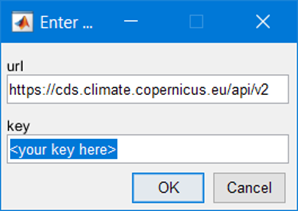


Select the data to download from the dataset (see [this webpage](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-sea-ice-thickness?tab=form) for options). This is a "MATLABized" version of the python structure that is generated in the API request.


In [1]:
datasetName ="satellite-sea-ice-thickness";
options.version = "1_0";
options.variable = "all";
options.satellite = "cryosat_2";
options.cdr_type = ["cdr","icdr"];
options.year = ["2011","2021"];
options.month = "03";
[downloadedFilePaths,citation] = climateDataStoreDownload('satellite-sea-ice-thickness',options);


Once imported with Python, the NetCDF files are read with MATLAB using [ncread](https://www.mathworks.com/help/matlab/ref/ncread.html) and storing information as [timetable](https://www.mathworks.com/help/matlab/timetables.html) with the function [<u>readSatelliteSeeIceThickness</u>](https://github.com/mathworks/climatedatastore/blob/main/doc/readSatelliteSeaIceThickness.m):


In [2]:
ice2011 = readSatelliteSeaIceThickness("satellite-sea-ice-thickness\ice_thickness_nh_ease2-250_cdr-v1p0_201103.nc");
ice2021 = readSatelliteSeaIceThickness("satellite-sea-ice-thickness\ice_thickness_nh_ease2-250_icdr-v1p0_202103.nc");
head(ice2021)

In [3]:
disp(citation)


This toolbox leverages the beautiful [geoplotting](https://www.mathworks.com/help/matlab/ref/geodensityplot.html) capabilities of MATLAB:


In [4]:
subplot(1,2,1)
geodensityplot(ice2011.lat,ice2011.lon,ice2011.thickness,"FaceColor","interp")
geolimits([23 85],[-181.4 16.4])
geobasemap("grayterrain")
title("Ice Thickness, March 2011")
subplot(1,2,2)
geodensityplot(ice2021.lat,ice2021.lon,ice2021.thickness,"FaceColor","interp")
geolimits([23 85],[-181.4 16.4])
geobasemap("grayterrain")
title("Ice Thickness, March 2021")
f = gcf;
f.Position(3) = f.Position(3)*2;



In a well written toolbox like this one, you find a documentation that is packaged directly with it.


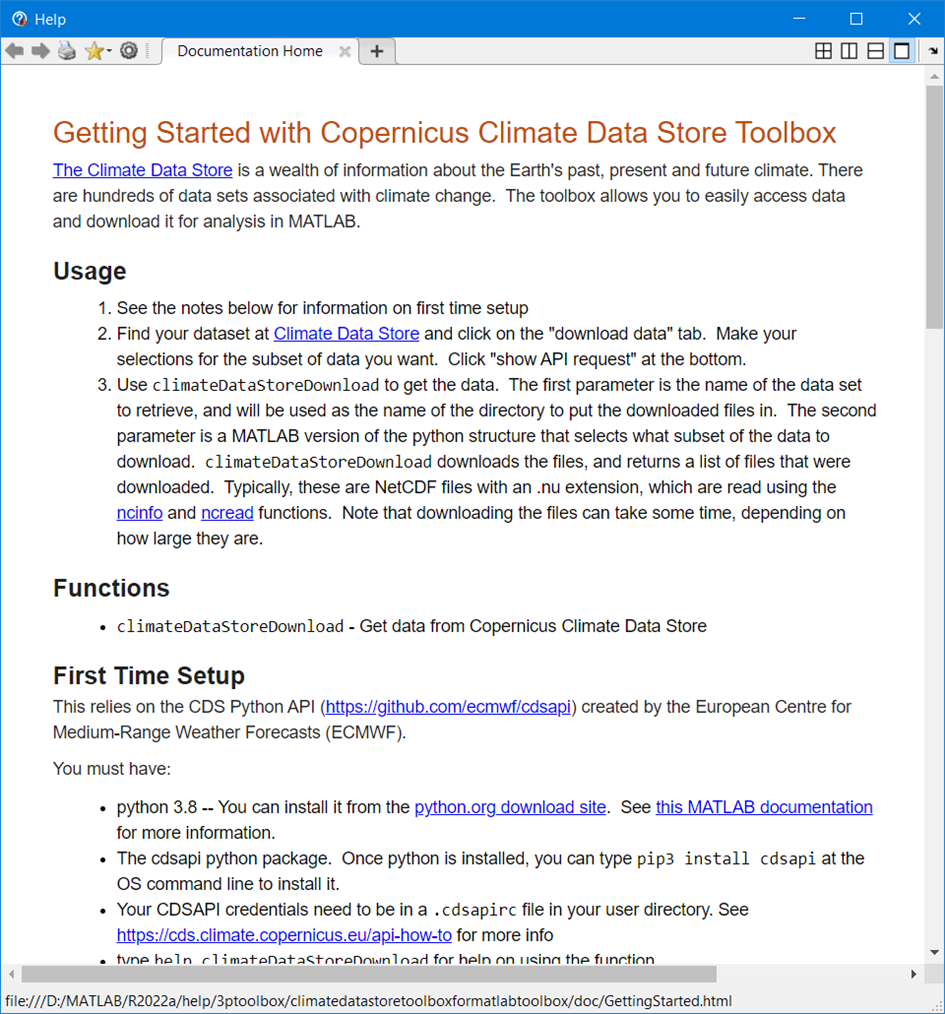


You can create your own toolbox and share it with others. These files can include MATLAB code, data, apps, examples, and documentation. When you create a toolbox, MATLAB generates a single installation file (.mltbx) that enables you or others to install your toolbox.


Read more on how to [create and share toolboxes](https://www.mathworks.com/help/matlab/matlab_prog/create-and-share-custom-matlab-toolboxes.html)

